</div>
<center>
<div class="figure" >
  <img src="https://www.ufpb.br/educacaofinanceira/contents/imagens/brasoes-universidades/ufpa.png/@@images/image.png" width="8%">
</div>
<center/>
</div>

Universidade Federal do Pará\
Campus Universitário de Tucuruí\
Faculdade de Engenharia Elétrica


TCC - Material Identificação de sistemas Aplicado ao Aeropêndulo

Orientador:

    Raphael Teixeira


Discente:

    Oséias Dias de Farias

<br>

## **<center> Modelagem de sistema por função de transferência pulsada - Identificação Aeropêndulo</center>**

<br>
<br>


## Resumo teórico sobre Identificação de Sistemas

Uma função de tranferência no domínio $z$ de ordem $N$ pode ser expressa da seguinte forma:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=1}^{M}b_m z^{-m}}
{1 + \sum\limits_{n=1}^{N}a_nz^{-n}} \tag{1}$$

Em que $X(z)$ e $Y(z)$  representam a transformada $z$ dos sinais de entada e de saída, respectivamente.

Ao desenvolver os somatórios temos:

$$ H(z) = \frac{ b_1z^{-1}+\dotsb+b_{M} z^{-M}}
{1+a_1z^{-1}+\dotsb+a_Nz^{-N}} \tag{2}$$

Ao aplicar a transformada $z$ inversa, obtem-se a equação de diferenças equivalente,

$$ y[k] = -a_1y[k-1] - \dotsb - a_N y[k-N]
+ b_1 x[k - 1] + \dotsb + b_M x[k-N] \tag{3}$$

Observe que se tem um sistema de equações dado por:

$$ \mathbf{y = \Psi \theta} \tag{4}$$

em que $\mathbf{\Psi}$ é a matriz de regressores que é definida como segue,  

$$ \mathbf{\Psi} = \begin{bmatrix}
-y[k-1] & \dotsb & -y[k-N] & x[k-1] & \dotsb & x[k-M]
\end{bmatrix} \tag{5}$$

Ao expandir para uma quantidade $N_{a}$ de amostras, a equação (4) tem-se

$$ \begin{bmatrix} y[0]\\ y[1] \\ \vdots\\ y[N_a] \end{bmatrix} = \begin{bmatrix} -y[0-1] & \dotsb & -y[0-N] & x[0-1] & \dotsb & x[0-M]\\-y[1-1] & \dotsb & -y[1-N] &
 x[1-1] & \dotsb & x[1-M]\\ \vdots & \dotsb & \vdots &
\vdots & \dotsb & \vdots \\-y[N_a-1] & \dotsb & -y[N_a-N] &
x[N_a-1] & \dotsb & x[N_a-M]   \end{bmatrix} \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix}$$

A matriz $\Psi$ é denomida de matriz de regressores por ser formada (no porcesso de construção) pelos termos do modelo (equação de diferenças) referentes aos sinais de entrada e de saída atrasados no tempo discreto. 

OBS: o coeficiente $b_0$ é zero, o que indica nenhuma conexão direta entre a entrada e a saída do sistema.

O vetor $\mathbf{\theta}$ é o vetor de coeficientes, definido como segue,

$$ \mathbf{\theta} = \begin{bmatrix} a_1\\ \vdots\\ a_N\\ b_1\\ \vdots\\ b_M \end{bmatrix} \tag{6}$$

e $\mathbf{y}$ é o vetor de saída no instante de tempo atual (k) . 

Para cada instante de tempo tem-se uma equação distinta, formando um sistema sobredeterminado, o que implica que não há solução exata. Para fins de práticos, uma aproximação é o suficiente. 

Observe que o problema de identificação é formulado de tal forma que os vetores de entrada e saída são conhecidos a partir dos sinais, dessa forma deve-se detrminar o vetor de coeficientes.

<p align='justify'>Para determinar o vetor de coeficientes utiliza-se o sistema de equações para formular um problema de mínimos quadrados, obtendo assim a seguinte expressão:</p>

$$ \mathbf{\theta}^{*} = \mathbf{\left(\Psi^T\Psi \right)^{-1}\Psi^Ty} \tag{7}$$

<p align='justify'>Após determinar o vetor de coeficientes pode-se substituir os valores obtidos na função de transferência proposta inicialmente e definir o modelo.</p>



## Validação do modelo

<p align='justify'>Geralmente na área de Identificação de Sistemas, é comum que, ao desenvolver um modelo, seja necessário verificar sua validade, pois é essencial avaliar se ele realmente representa adequadamente a dinâmica do sistema de forma aproximada.</p>

<p align='justify'>Existem diversos métodos para validar um modelo, aqui iremos optar por utilizar uma métrica chamada NRMSE (Normalized Root Mean Square Error). O NRMSE é uma métrica amplamente utilizada para avaliar a qualidade de um modelo em relação aos dados observados.</p>

$$ NRMSE = \Big(1 - \frac{\sum(y - y_p)^2}{\sum(y - \mu_y)^2} \Big)\cdot 100\%$$


### Aplicando Identificação de sistemas no Aeropêndulo

In [122]:
import matplotlib.pyplot as plt

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy
import scipy.signal as sg
from control.matlab import *
from sklearn.metrics import mean_squared_error
import scienceplots

#!pip install scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

**Importando as bibliotecas usadas para a análise**

In [123]:
# (url github) https://github.com/Oseiasdfarias/Projeto_Tcc_Oseias_Oficial/blob/main/interface_aeropendulo/interface/dados_de_ensaio/arquivo_25_6_2023_16_20_28.csv
file = "../../interface_aeropendulo/interface/dados_de_ensaio/arquivo_9_9_2023_13_33_24.csv"
dados_malha_aberta = pd.read_csv(file, header=None, sep=',').values
dados_malha_aberta[0][0] = 0.0
dados_malha_aberta

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 0.00000e+00, 2.31430e+01, ..., 1.00000e+00,
        1.00000e+00, 3.94000e+00],
       [1.00000e+00, 0.00000e+00, 2.30770e+01, ..., 1.00000e+00,
        1.00000e+00, 3.96000e+00],
       ...,
       [6.26800e+03, 0.00000e+00, 3.30990e+01, ..., 1.30000e+00,
        1.30000e+00, 1.29291e+02],
       [6.26900e+03, 0.00000e+00, 3.33630e+01, ..., 1.30000e+00,
        1.30000e+00, 1.29311e+02],
       [6.27000e+03, 0.00000e+00, 3.31650e+01, ..., 1.30000e+00,
        1.30000e+00, 1.29331e+02]])

**Obtendo os sinais do ensaio**

In [124]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_prbs_entrada  = np.array(dados_malha_aberta[:,6])
sinal_saida = np.array(dados_malha_aberta[:,2])

# Convertendo o sinal de Graus para Radianos
sinal_saida = np.squeeze(np.deg2rad(sinal_saida))
tempo = tempo - min(tempo)

#### Plotagem dos sinais

**Sinais de Entrada e de Saída**

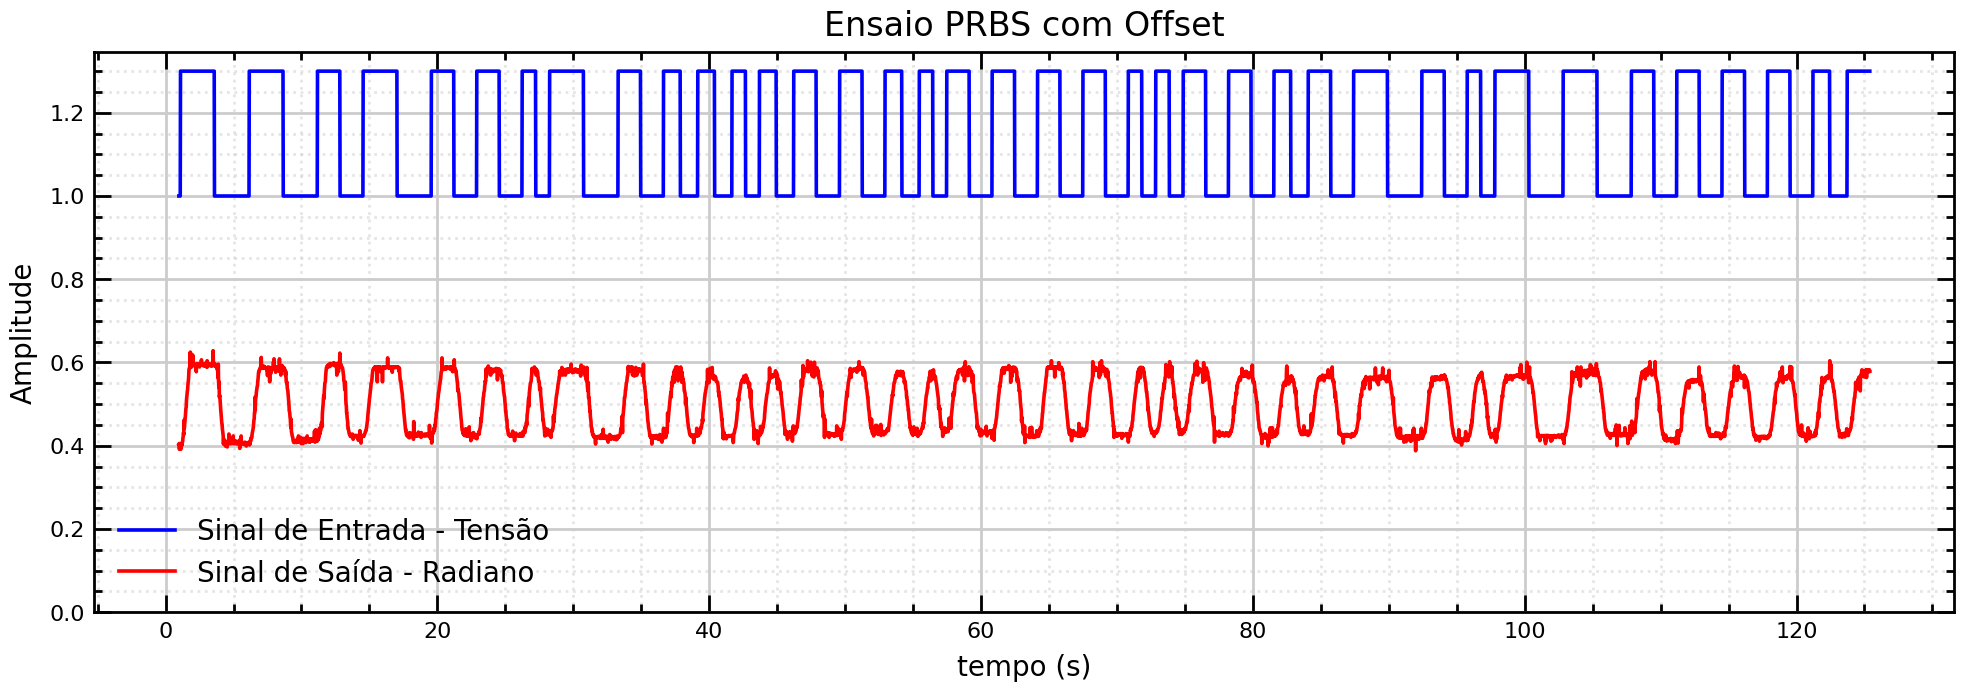

In [125]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_prbs_entrada[50:],
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], (sinal_saida[50:]),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")
plt.yticks(np.arange(0, 1.3, 0.2))

plt. title('Ensaio PRBS com Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

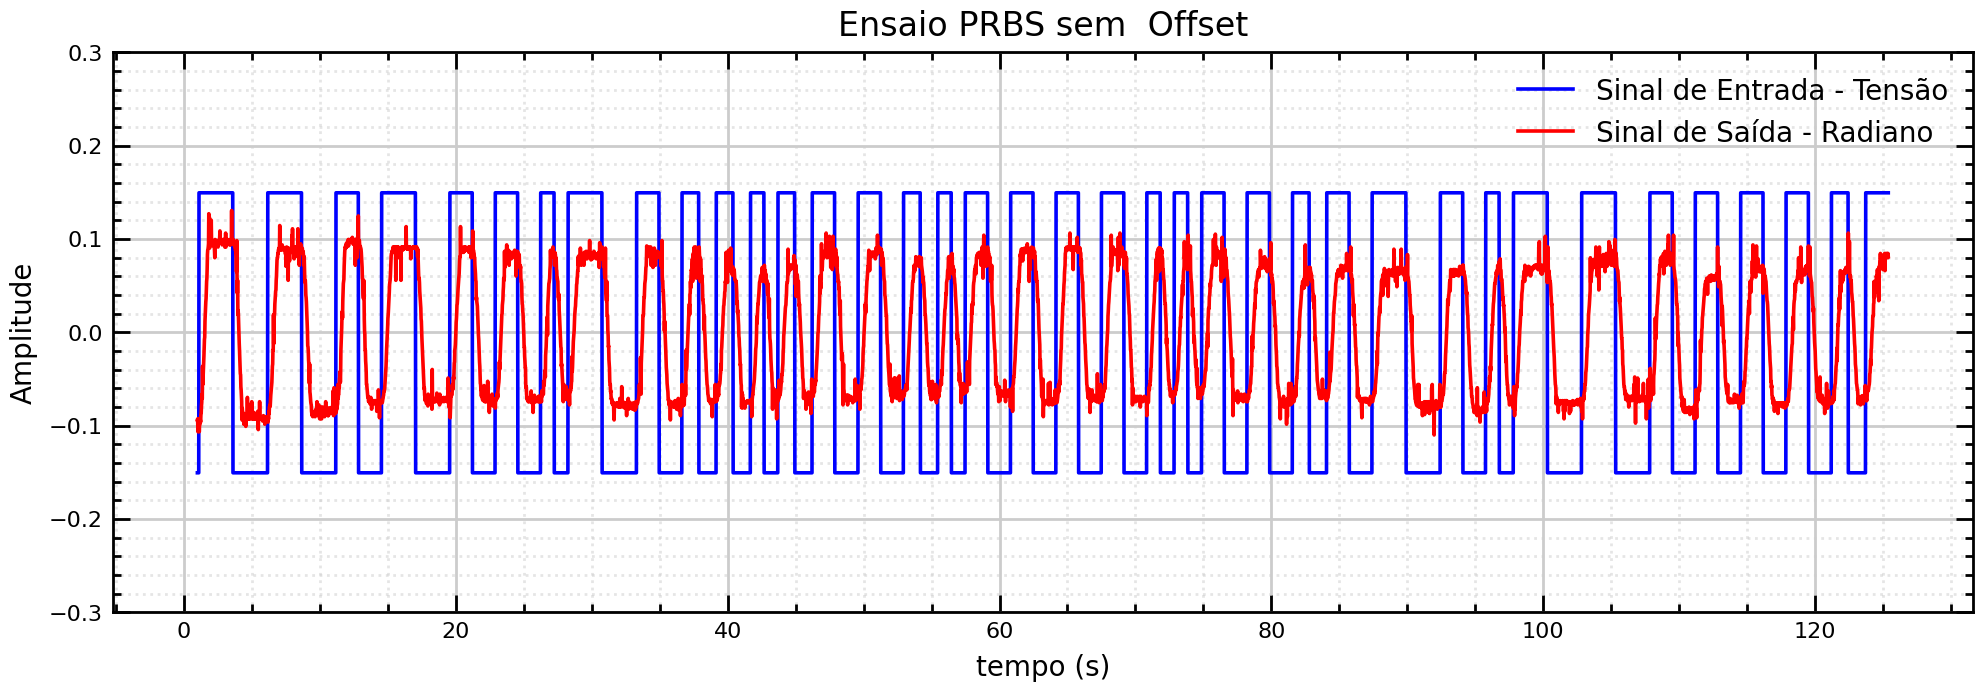

In [126]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_prbs_entrada[50:] - np.mean(sinal_prbs_entrada[50:]),
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], (sinal_saida[50:]) - np.mean((sinal_saida[50:])),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Ensaio PRBS sem  Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)
plt.yticks(np.arange(-0.3, 0.4, 0.1))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [127]:
N = len(sinal_prbs_entrada)

In [128]:
percIdent = 0.6             # Percentual dos dados de identificação:
Ni = int(percIdent * N)     # Quantidade de amostras para identificação:
Ni

3763

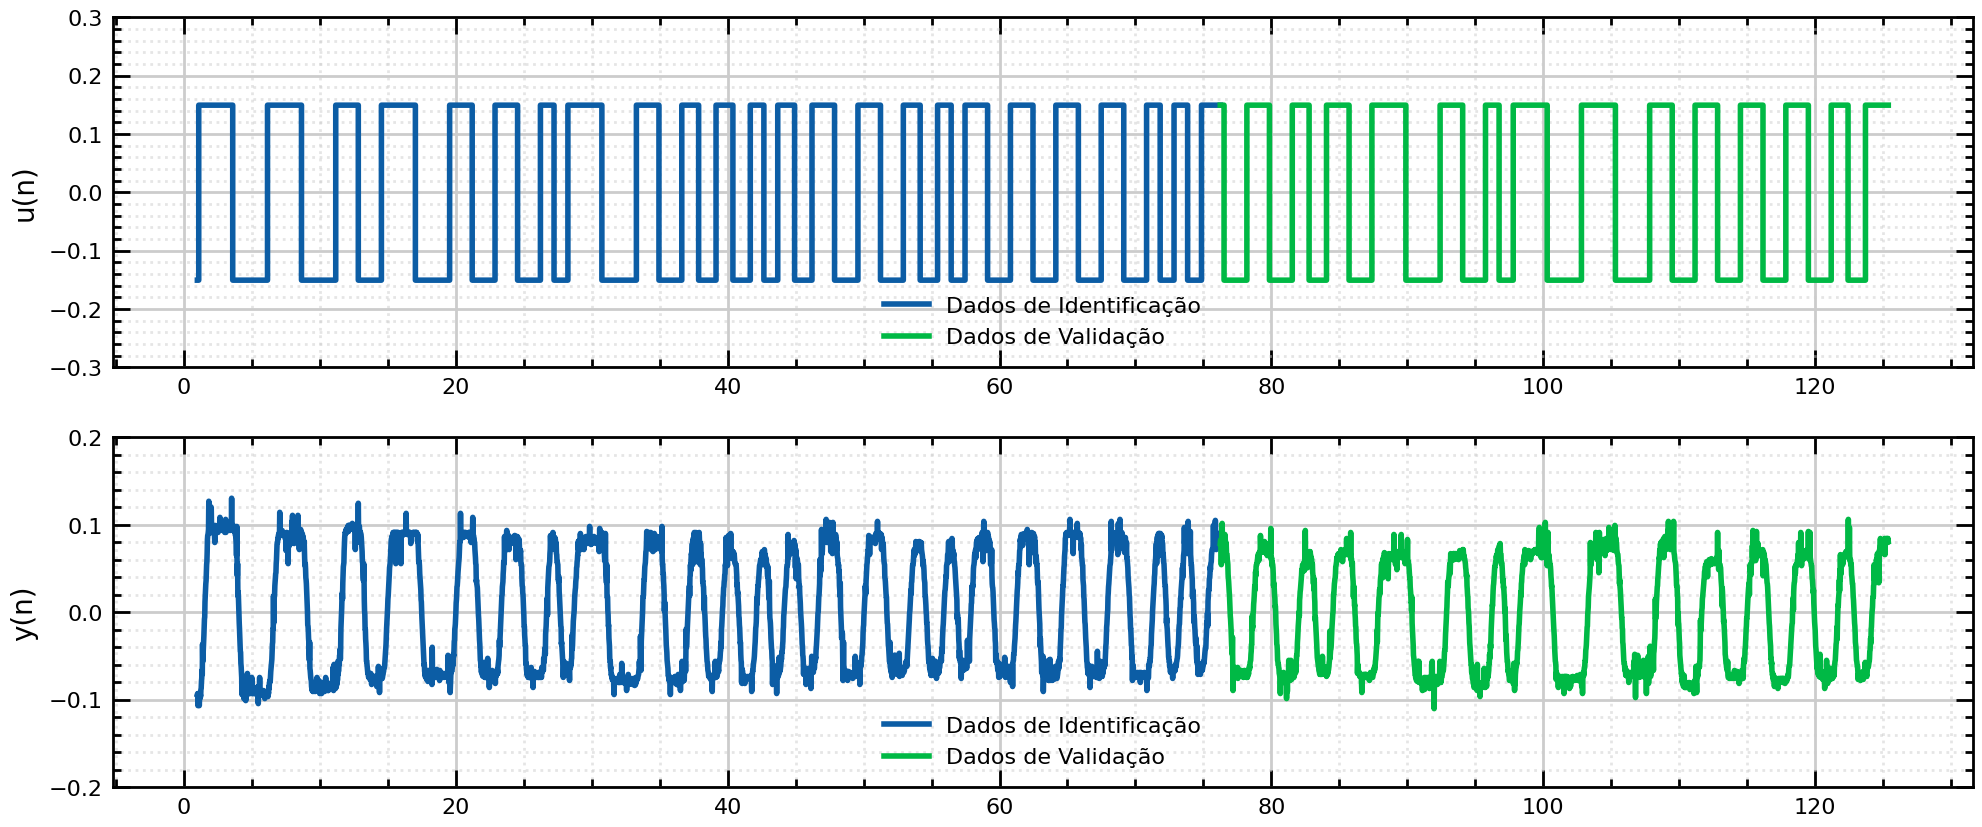

In [129]:
u1 = sinal_prbs_entrada[50:] - np.mean(sinal_prbs_entrada[50:])
yout = sinal_saida[50:] - np.mean((sinal_saida[50:]))
t = tempo[50:]

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(-0.30, 0.4, 0.1))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], label='Dados de Validação')
plt.yticks(np.arange(-0.20, 0.30, 0.1))
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

### Identificação usando um sistemas de segunda ordem discreto


**Função de transferência do sistema**

$$
    H(z) = \frac{b_1z^{-1}+b_2z^{-2}}
    {1+a_1z^{-1}+a_2z^{-2}} \tag{10}
$$



In [130]:
# Matriz de regressão:
nb = 3; na = 2
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:, na + l] = u1[ni - l]

print(M.shape)

# Mínimos quadrados
thetaA = np.linalg.inv(M.T @ M) @ M.T @ yout[ni]
thetaA

(3763, 5)


array([ 0.60610653,  0.35822763,  0.00519773, -0.00506169,  0.0270937 ])

In [131]:
Ts = np.mean(np.diff(tempo))
print(f"\nMédia do periodo de amostragem: {Ts:.4f}\n")


Média do periodo de amostragem: 0.0197



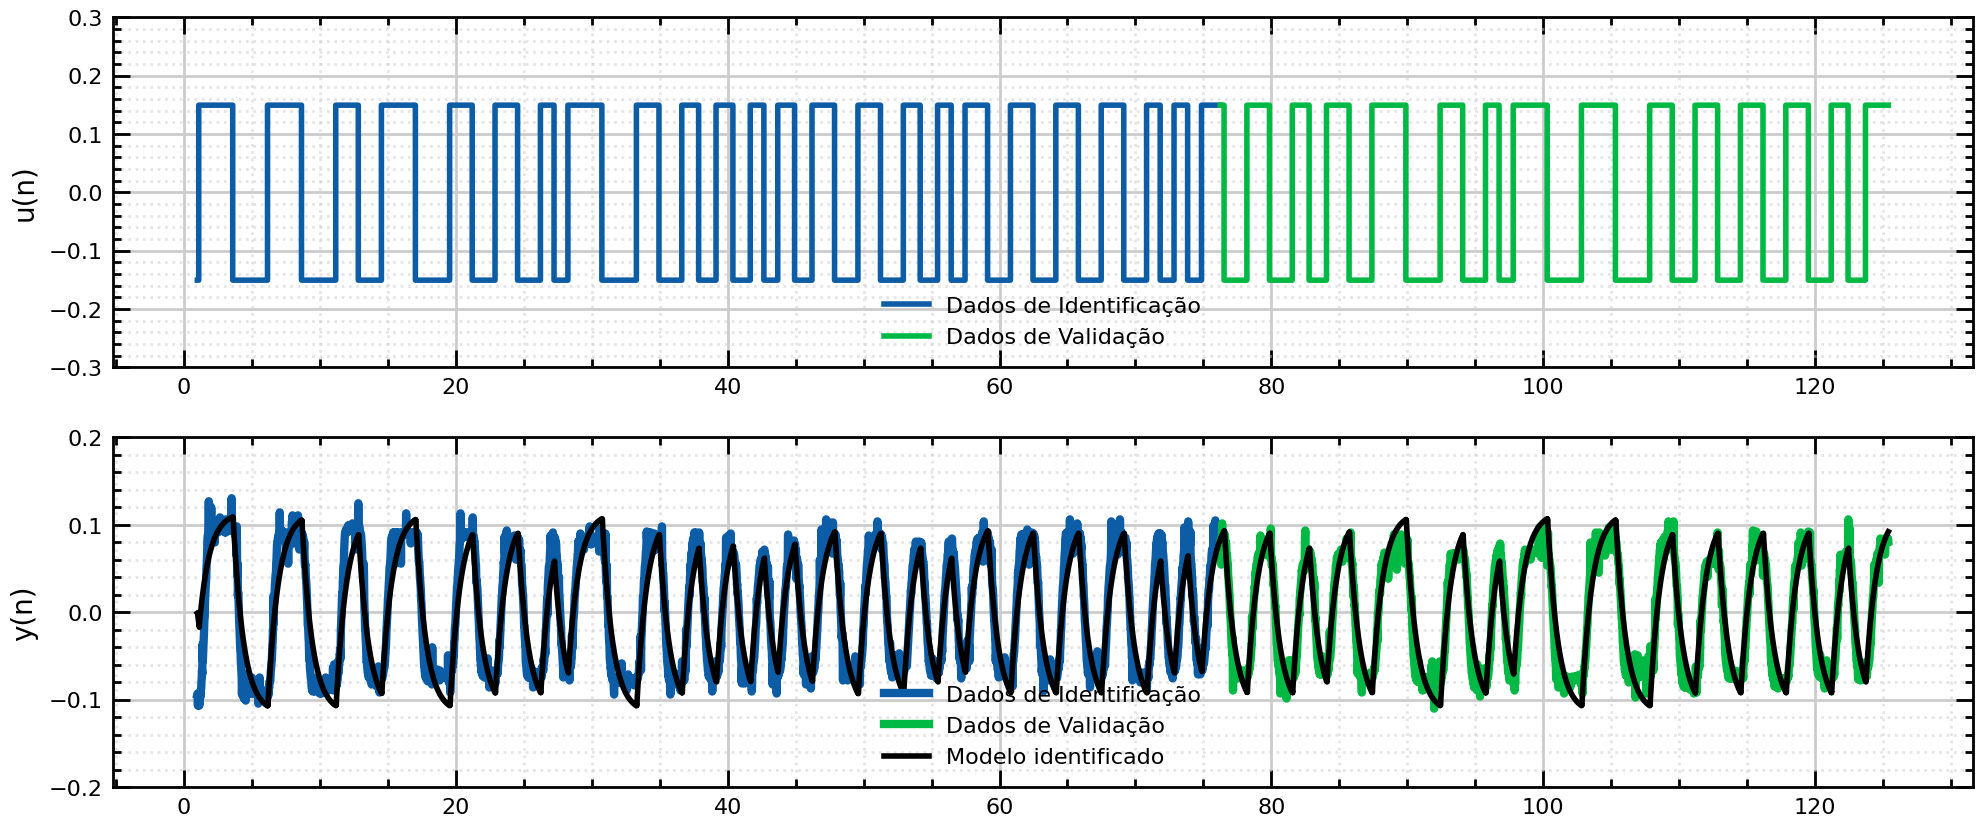

TransferFunction(array([ 0.00519773, -0.00506169,  0.0270937 ]), array([ 1.        , -0.60610653, -0.35822763]), 0.019666879285600382)

In [132]:
a1, a2 = thetaA[:2]
b0, b1, b2 = thetaA[2:]

Ba = [b0 , b1, b2]
Aa = [1, -a1, -a2]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(-0.30, 0.4, 0.1))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth=3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth=3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

Gz

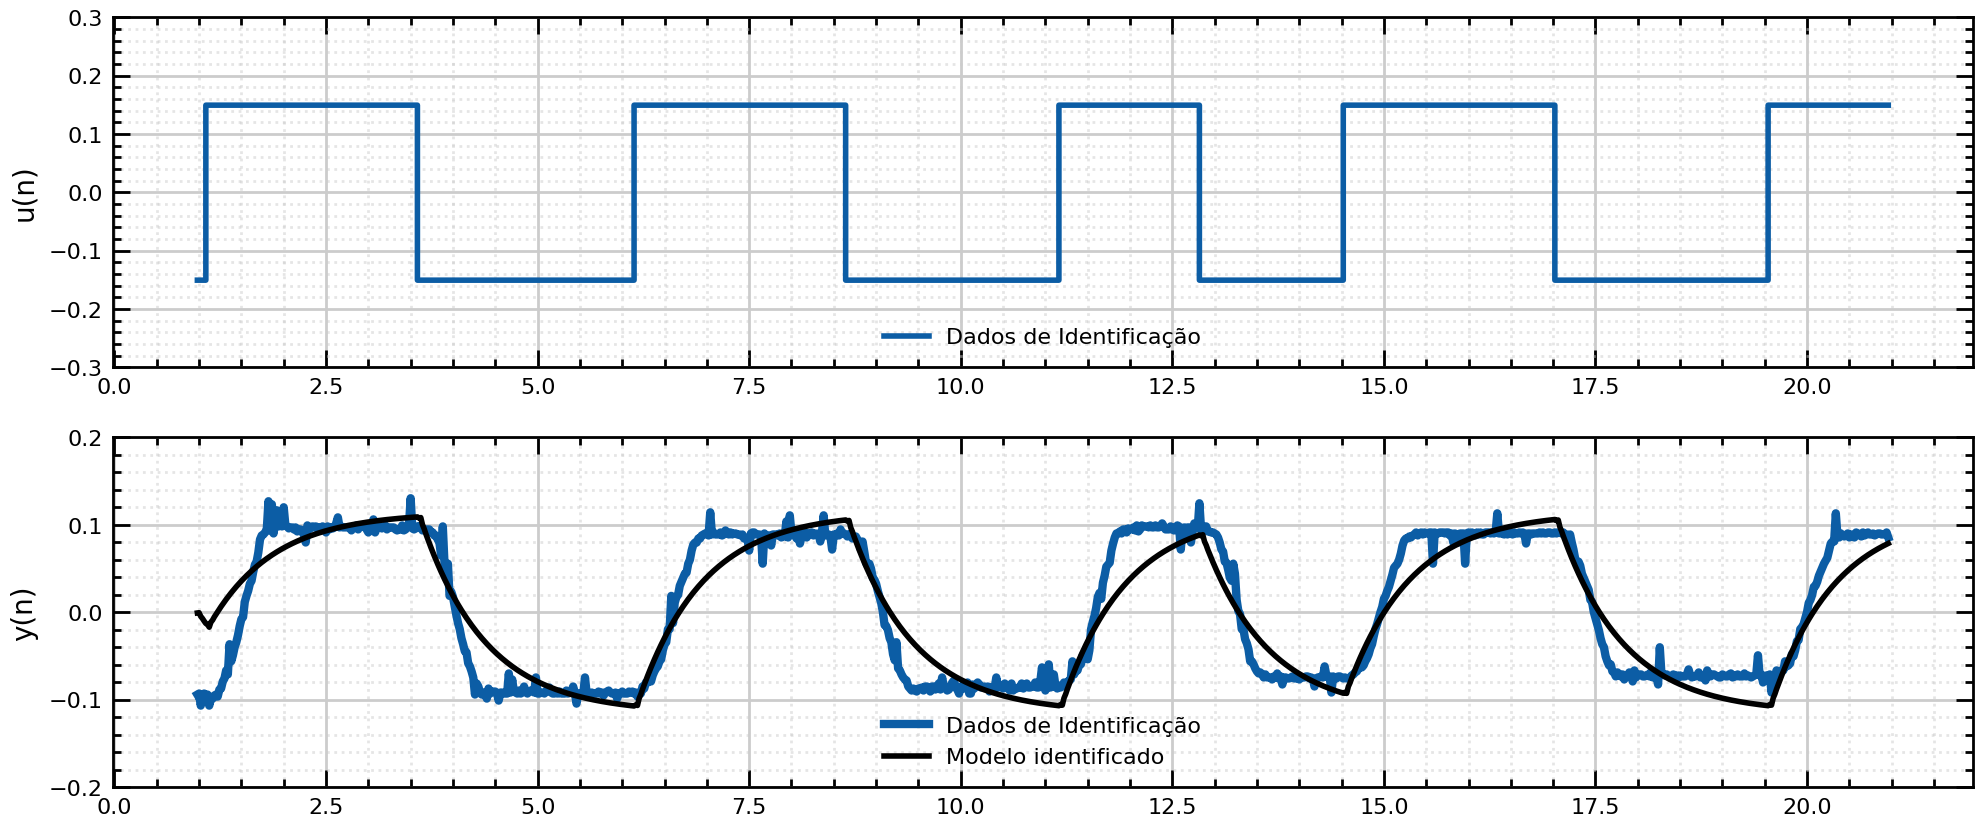

In [133]:

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:1000], u1[:1000], label='Dados de Identificação')
plt.yticks(np.arange(-0.30, 0.4, 0.1))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:1000], yout[:1000], linewidth = 3.0, label='Dados de Identificação')
plt.plot(t[:1000], yp[:1000], 'k', label='Modelo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

**Expressão para encontrar o NRMSE**

$$ NRMSE = \Big(1 - \frac{\sum(y - y_p)^2}{\sum(y - \mu_y)^2} \Big)\cdot 100\%$$

In [134]:
# Avaliação por NRMSE:
NRMSE = (1- np.sqrt(np.sum((yout[Ni:] - yp[Ni:])**2)) /\
         np.sqrt(np.sum((yout[Ni:] - np.mean(yout[Ni:]))**2)))*100
print('Ajuste: ', NRMSE.round(2),"%")

Ajuste:  68.81 %


### Identificação usando um sistemas de quinta ordem

$$
    H(z) = \frac{b_1z^{-1}+b_2z^{-2}}
    {1+a_1z^{-1}+a_2z^{-2}+a_2z^{-3}+a_2z^{-4}+a_2z^{-5}}
$$



In [135]:
# Matriz de regressão:
nb = 2; na = 5
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3763, 7)


array([ 0.57674881,  0.34644565,  0.17888406,  0.04751028, -0.17978149,
        0.00290203,  0.01921715])

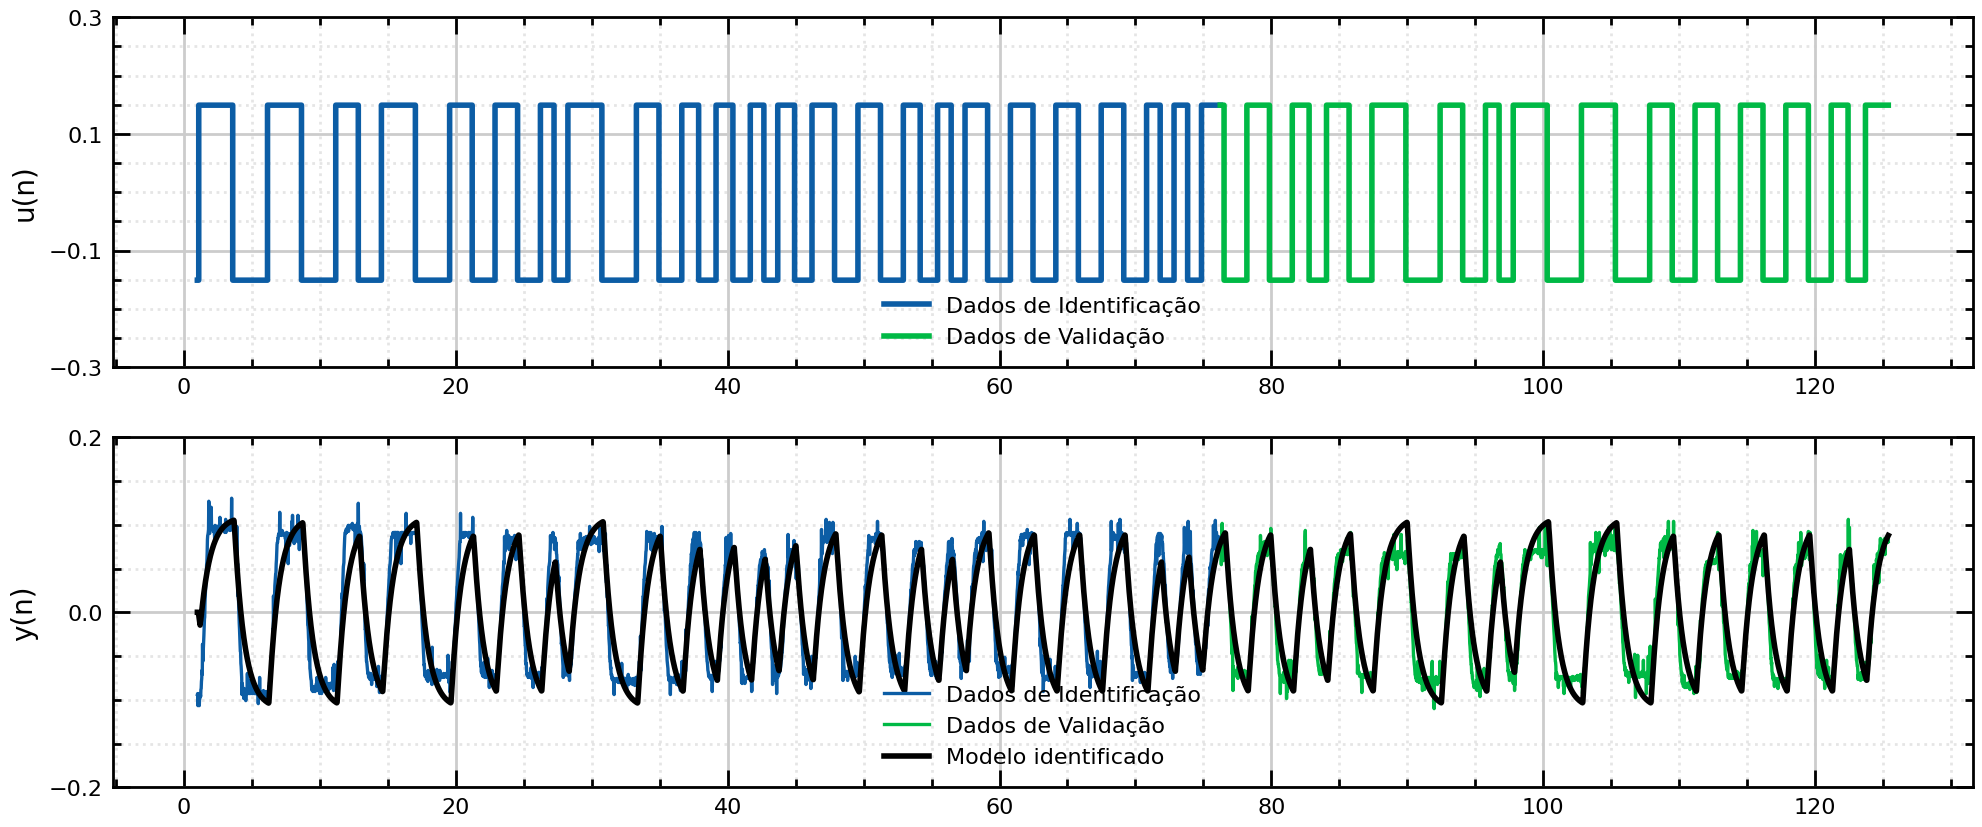

TransferFunction(array([0.00290203, 0.01921715]), array([ 1.        , -0.57674881, -0.34644565, -0.17888406, -0.04751028,
        0.17978149]), 0.019666879285600382)

In [136]:
a1, a2, a3, a4, a5 = thetaA[:5]
b0, b1 = thetaA[5:]

Aa = [1, -a1, -a2, -a3, -a4, -a5]
Ba = [b0 , b1]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth = 1.2, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth = 1.2, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.2))
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

Gz

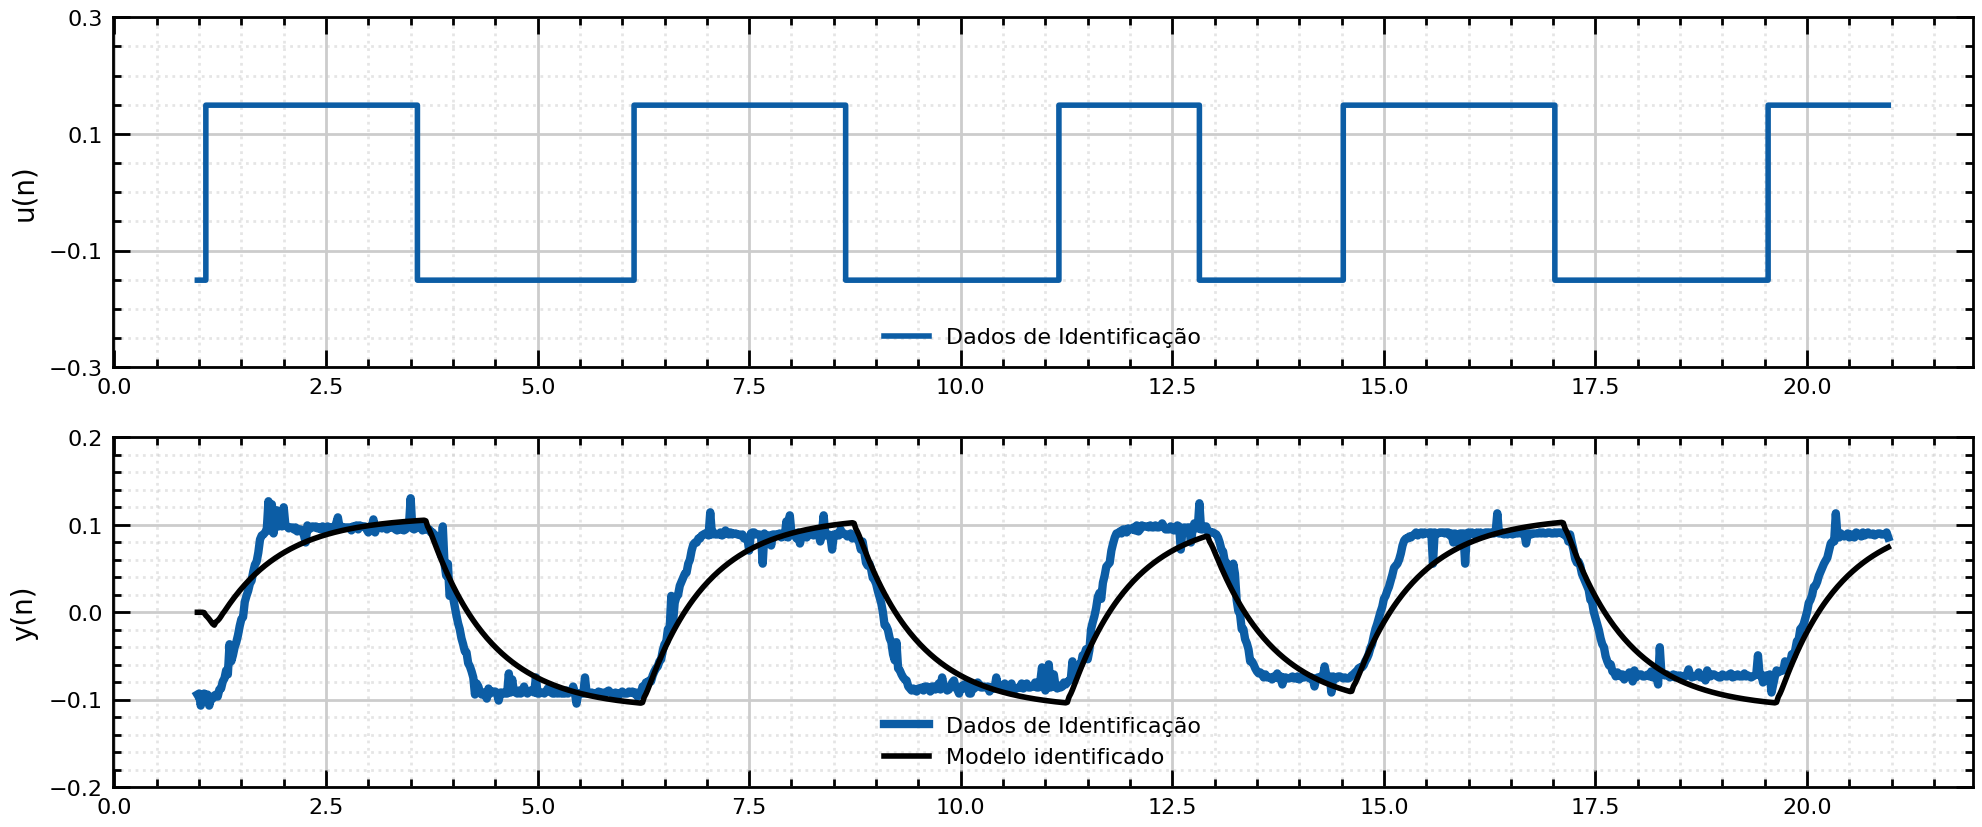

In [137]:

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:1000], u1[:1000], label='Dados de Identificação')
plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:1000], yout[:1000], linewidth = 3.0, label='Dados de Identificação')
plt.plot(t[:1000], yp[:1000], 'k', label='Modelo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

In [138]:
# Avaliação por NRMSE:
NRMSE = (1- np.sqrt(np.sum((yout[Ni:] - yp[Ni:])**2))/\
         np.sqrt(np.sum((yout[Ni:] - np.mean(yout[Ni:]))**2)))*100
print('\nAjuste: ', NRMSE.round(2),"%\n")


Ajuste:  65.4 %



### Identificação usando um sistemas de décima ordem

$$
    H(z) = \frac{b_1z^{-1}+b_2z^{-2}+b_2z^{-3}+b_2z^{-4}}
    {1+a_1z^{-1}+a_2z^{-2}+a_2z^{-3}+a_2z^{-4}+a_2z^{-5}+a_2z^{-6}+a_2z^{-7}+a_2z^{-8}+a_2z^{-9}+a_2z^{-10}}
$$

In [139]:
# Matriz de regressão:
nb = 4
na = 10
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3763, 14)


array([ 0.40797835,  0.28716742,  0.21919818,  0.19901451,  0.09890358,
        0.01344647, -0.00698487, -0.06561701, -0.09932877, -0.09284738,
        0.00064029, -0.0048339 ,  0.00944229,  0.01385569])

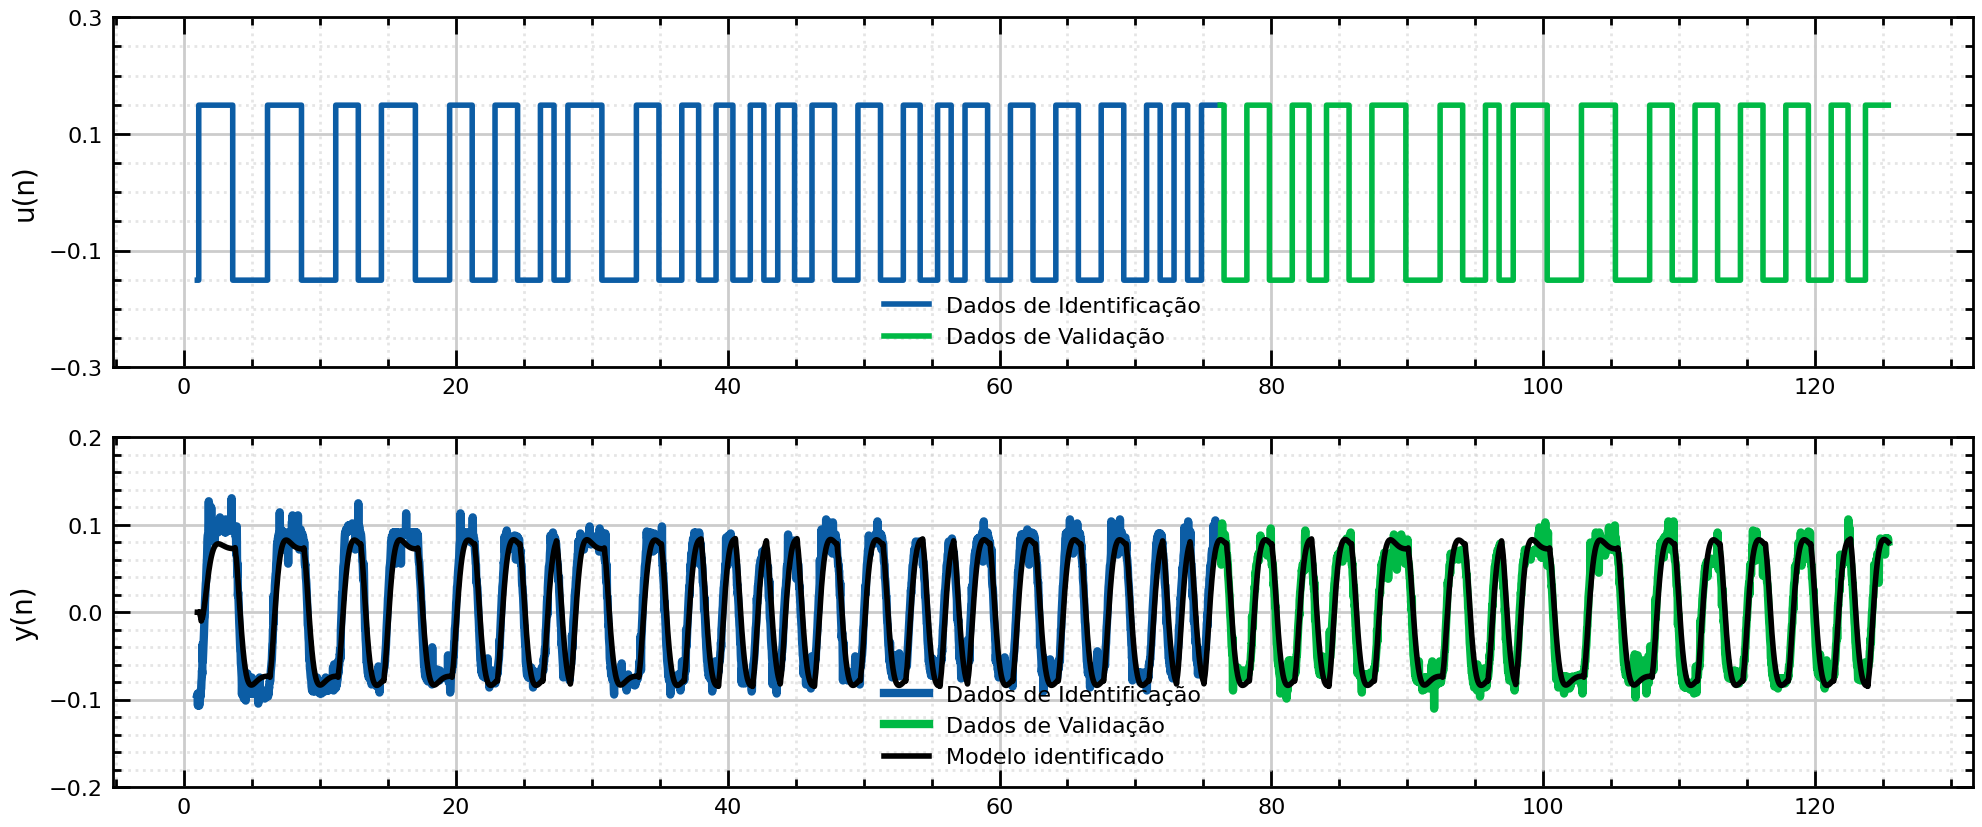

TransferFunction(array([ 0.00064029, -0.0048339 ,  0.00944229,  0.01385569]), array([ 1.        , -0.40797835, -0.28716742, -0.21919818, -0.19901451,
       -0.09890358, -0.01344647,  0.00698487,  0.06561701,  0.09932877,
        0.09284738]), 0.019666879285600382)

In [140]:
a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = thetaA[:10]
b0, b1, b2, b3 = thetaA[10:]

Ba = [b0 , b1, b2, b3]
Aa = [1, -a1, -a2, -a3, -a4, -a5, -a6, -a7, -a8, -a9, -a10]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth = 3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth = 3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

Gz

In [141]:
# Avaliação por NRMSE:
NRMSE = (1- np.sqrt(np.sum((yout[Ni:] - yp[Ni:])**2))/\
         np.sqrt(np.sum((yout[Ni:] - np.mean(yout[Ni:]))**2)))*100
print('\nAjuste: ', NRMSE.round(2),"%\n")


Ajuste:  72.52 %



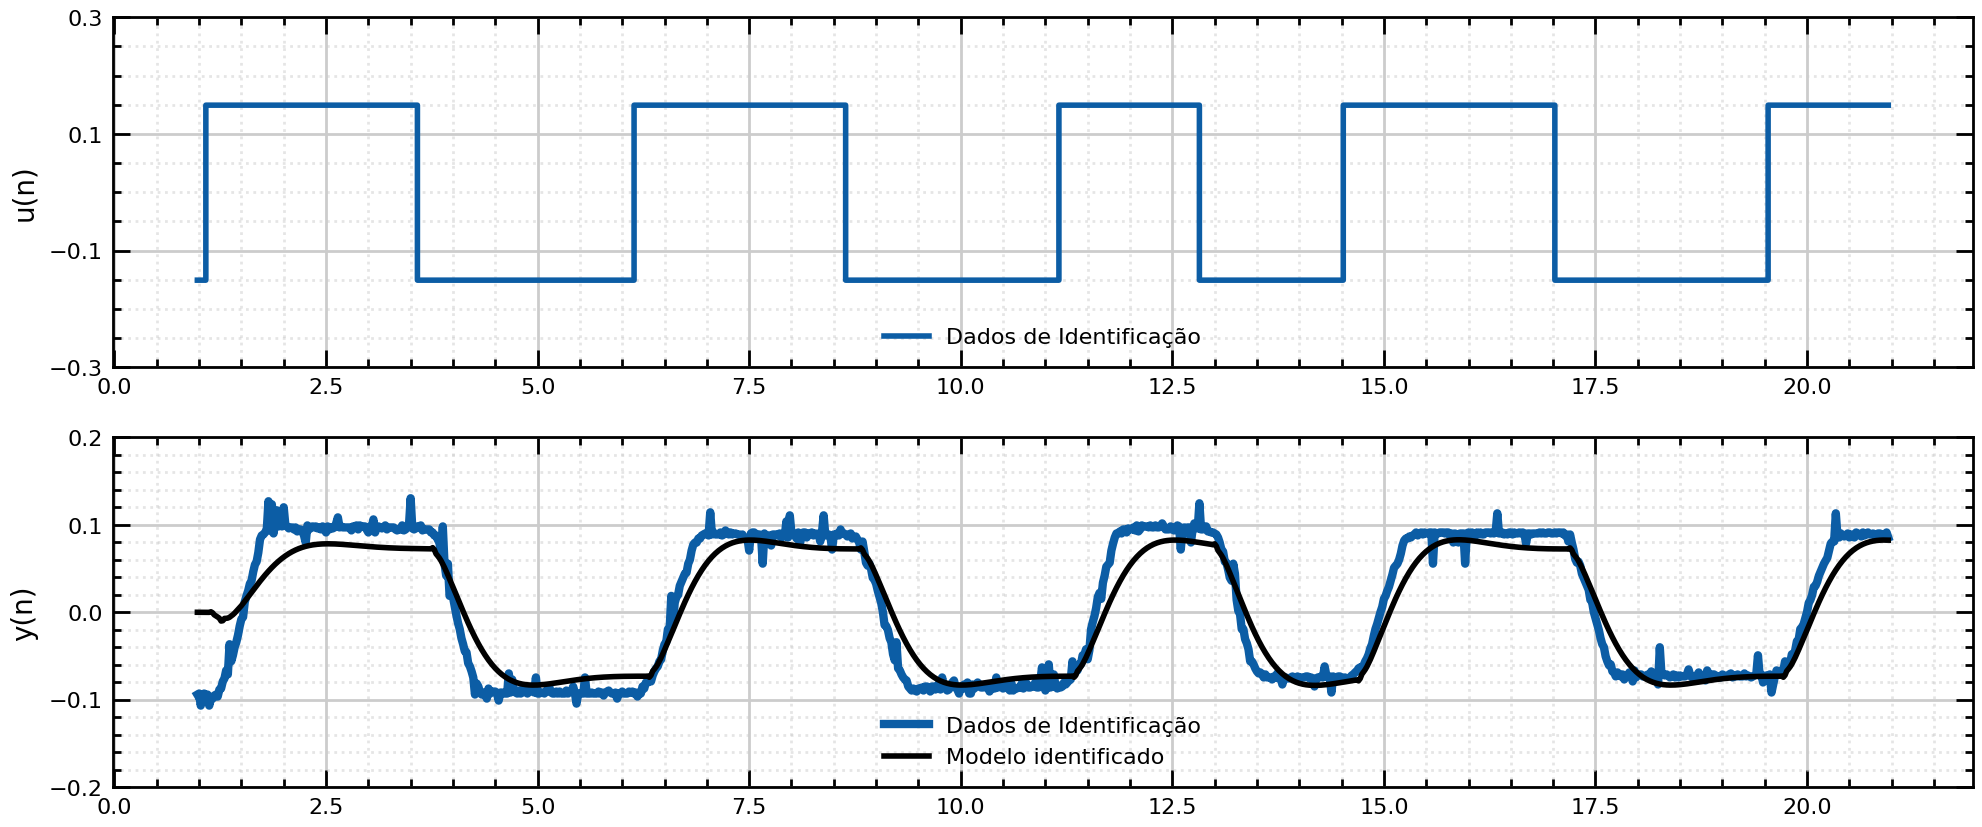

In [142]:

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t[:1000], u1[:1000], label='Dados de Identificação')
plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:1000], yout[:1000], linewidth = 3.0, label='Dados de Identificação')
plt.plot(t[:1000], yp[:1000], 'k', label='Modelo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

## Conclusão

Ao aplicar a identificação de sistemas foi possível observar que os modelos de ordem menor não conseguiram capturar a dinâmica do sistema de forma rasoável, no entanto o modelo de ordem mais elevada teve relativo éxito.

no entanto, esse foi um primeiro teste de validação da bancada, serão realizados novos testes usando diferentes valores de frequência para o sinal PRBS assim como diferentes valores de amplitude e de offset, com isso será possível encontrar melhores parâmetros para o sinal PRBS que possibilite identificar o sistema mais precisamente, sem a necessidade de optar por modelos de ordem muito elevada.